# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pprint import pprint

# Data

## Raw Data

In [3]:
dates = pd.read_csv("../data/raw/shop_sales_dates.csv")
prices = pd.read_csv("../data/raw/shop_sales_prices.csv")
sales = pd.read_csv("../data/raw/shop_sales.csv")

## Columns and missing values

In [4]:
pprint(
    [dates.columns.tolist(),
    prices.columns.tolist(),
    sales.columns.tolist(),]
)

[['date',
  'wm_yr_wk',
  'weekday',
  'wday',
  'month',
  'year',
  'event_name_1',
  'event_type_1',
  'event_name_2',
  'event_type_2',
  'date_id',
  'CASHBACK_STORE_1',
  'CASHBACK_STORE_2',
  'CASHBACK_STORE_3'],
 ['store_id', 'item_id', 'wm_yr_wk', 'sell_price'],
 ['item_id', 'store_id', 'date_id', 'cnt']]


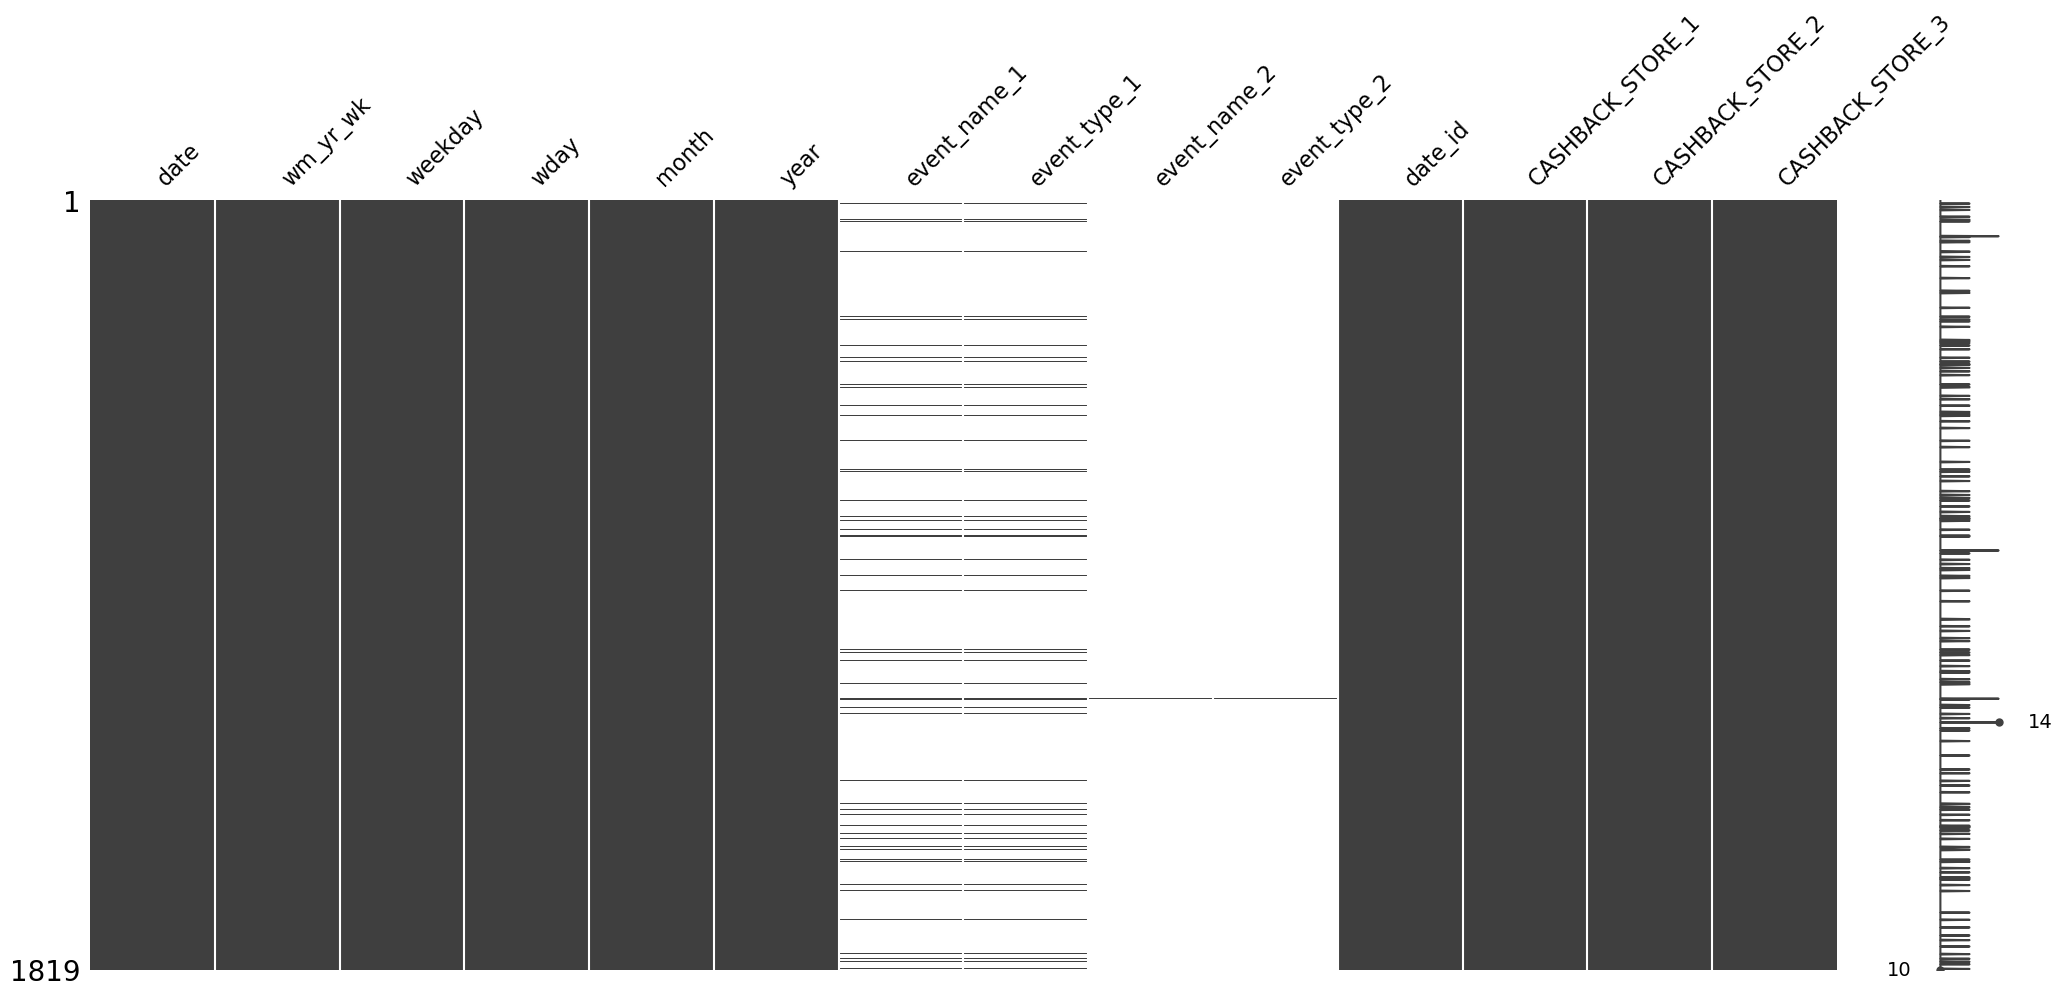

In [5]:
# sales and prices don't have missing values
msno.matrix(dates)
plt.show()

# EDA

In [6]:
pprint(dates.event_type_1.unique().tolist())

[nan, 'Sporting', 'Cultural', 'National', 'Religious']


In [7]:
pprint(prices.store_id.unique().tolist())

['STORE_2', 'STORE_3', 'STORE_1']


In [8]:
sales["item_type"] = sales["item_id"].apply(lambda x: x[-3:])
print(f"Unique items: {sales.item_type.unique().shape[0]}")

Unique items: 31


### Joining dataframes

In [9]:
# merge on date_id to get wm_yr_wk for sales
main_df = pd.merge(
    left=sales,
    right=dates[["date_id", "wm_yr_wk"]],
    how="left",
    left_on="date_id",
    right_on="date_id",
    suffixes=("", ""),
)

# merge on (wm_yr_wk, item_id) to get price for particular week
main_df = pd.merge(
    left=main_df,
    right=prices[["item_id", "wm_yr_wk", "sell_price"]],
    how="left",
    left_on=("wm_yr_wk", "item_id"),
    right_on=("wm_yr_wk", "item_id"),
    suffixes=("", ""),
)

main_df

,item_id,store_id,date_id,cnt,item_type,wm_yr_wk,sell_price
0,STORE_2_085,STORE_2,1,3,085,11101,1.00
1,STORE_2_085,STORE_2,2,8,085,11101,1.00
2,STORE_2_085,STORE_2,3,0,085,11101,1.00
3,STORE_2_085,STORE_2,4,3,085,11101,1.00
4,STORE_2_085,STORE_2,5,0,085,11101,1.00
...,...,...,...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2,727,11551,4.48
81851,STORE_1_727,STORE_1,1816,3,727,11551,4.48
81852,STORE_1_727,STORE_1,1817,1,727,11551,4.48
81853,STORE_1_727,STORE_1,1818,4,727,11551,4.48


### Prices and sales boxplot

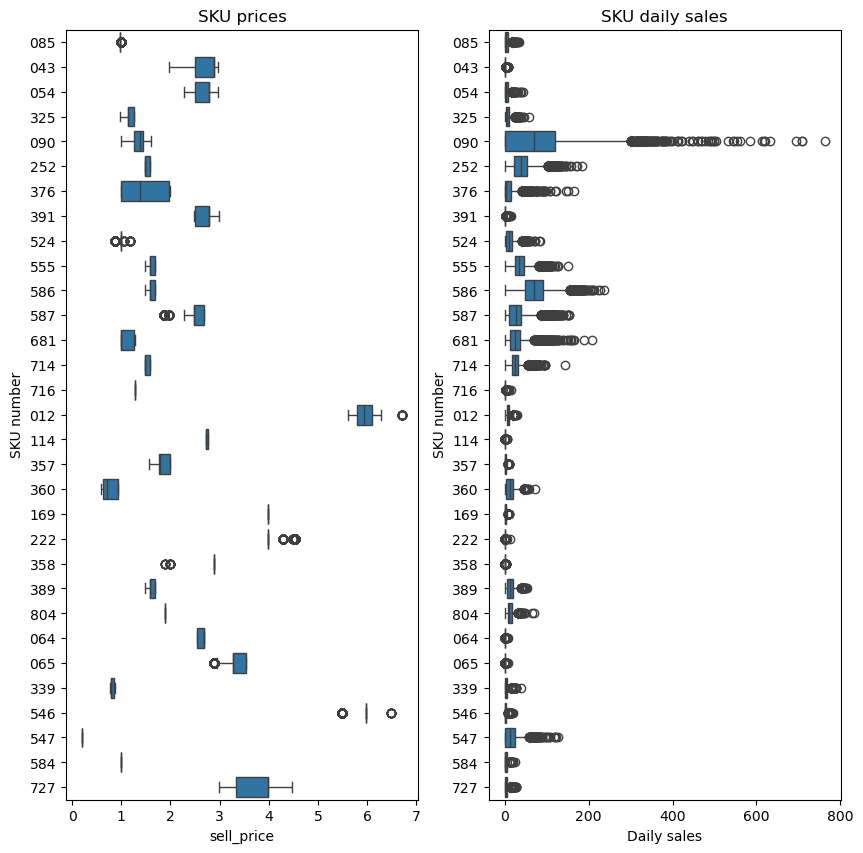

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.boxplot(
    main_df[["sell_price", "item_type"]], x="sell_price", y="item_type", ax=ax[0]
)
ax[0].set_ylabel("SKU number")
ax[0].set_title("SKU prices")

sns.boxplot(
    main_df[["cnt", "item_type"]], x="cnt", y="item_type", ax=ax[1], 
)
ax[1].set_ylabel("SKU number")
ax[1].set_xlabel("Daily sales")
ax[1].set_title("SKU daily sales")

# ax[1].set_xscale("log")

plt.show()